In [1]:
import numpy as np
import os 
import matplotlib.pyplot as plt
import matplotlib
import subprocess
import math

directory_to_check = "/bgfs/kjohnson/pbs13/FlexibleMOFs-GCMC/acetone_Rogge_7Loadingacetone_final/acetone_severalsnaps/30000.0/"
cycles = np.array([],dtype = float)
Ntotal = np.array([],dtype = float)

def myfile(filePath1):
    global cycles,Nlist,equicycles,Ntotal
    if os.path.isfile(filePath1):
        f = open(filePath1,"r")
        f1 = f.readlines()
        equicycles = np.array([],dtype=float)
        Nlist = np.array([],dtype=float)
        
        for n in np.r_[8452:len(f1)]:
            if "[Init] Current cycle:" in f1[n]:
                i1 = f1[n].split()
                cyclenumber = (i1[3])  
                #print(cyclenumber)
                i3 = f1[n+12].split()
                #print(i3)
                N = (i3[8])  ### Number of molecules in the output file ("current number of integer/fractional/reaction molecules")
                X = N.split('/')    
                Nlist = np.append(Nlist,float(X[0]))
                equicycles = np.append(equicycles,float(cyclenumber))
                
        Ntotal = np.append(Ntotal,Nlist)
        cycles = np.append(cycles,equicycles)
        print(cycles) 
        print(Ntotal) ## Instantaneous total number of molecules
                

Pressure1 = []
P = np.array([],dtype = float)

def myfunction(directory):
    global Pressure1,P
    
    for filename in os.listdir(directory):
        
        if filename.endswith(".data") and "1.1.1" in filename:
            print(directory+"/"+filename)
            myfile(directory+"/"+filename)
    
    X=directory.split('/')
    Pressure1 = np.append(Pressure1,float(X[7])) ## Change X[8] index to Pressure index from the path of the directory. 
                                                ## Note that I store pressure in Pa e.g., '1216' and not '1216Pa'
    
    print("Pressure: ", float(X[7]))
    
            
directories = [os.path.abspath(x[0]) for x in os.walk(directory_to_check)]


for i in directories:

        if "Output" in i and "System_0" in i and ".ipynb_checkpoints" not in i:    
                os.chdir(i)         # Change working Directory
                myfunction(i)
                


            


/bgfs/kjohnson/pbs13/FlexibleMOFs-GCMC/acetone_Rogge_7Loadingacetone_final/acetone_severalsnaps/30000.0/17/Output/System_0/output_finalmovie-17_1.1.1_298.000000_30000.data
[    0.  1000.  2000.  3000.  4000.  5000.  6000.  7000.  8000.  9000.
 10000. 11000. 12000. 13000. 14000. 15000. 16000. 17000. 18000. 19000.
 20000. 21000. 22000. 23000. 24000. 25000. 26000. 27000. 28000. 29000.
 30000. 31000. 32000. 33000. 34000. 35000. 36000. 37000. 38000. 39000.
 40000. 41000. 42000. 43000. 44000. 45000. 46000. 47000. 48000. 49000.
 50000. 51000. 52000. 53000. 54000. 55000. 56000. 57000. 58000. 59000.
 60000. 61000. 62000. 63000. 64000. 65000. 66000. 67000. 68000. 69000.
 70000.]
[  0. 176. 184. 192. 195. 195. 196. 200. 200. 199. 203. 202. 205. 208.
 210. 213. 215. 218. 217. 216. 216. 217. 217. 213. 216. 219. 215. 219.
 219. 218. 216. 218. 218. 219. 217. 218. 218. 219. 219. 219. 221. 222.
 224. 220. 220. 221. 220. 222. 223. 223. 223. 225. 224. 225. 227. 227.
 226. 225. 225. 225. 226. 227. 226. 22

Text(0.5, 0, 'Number of cycles')

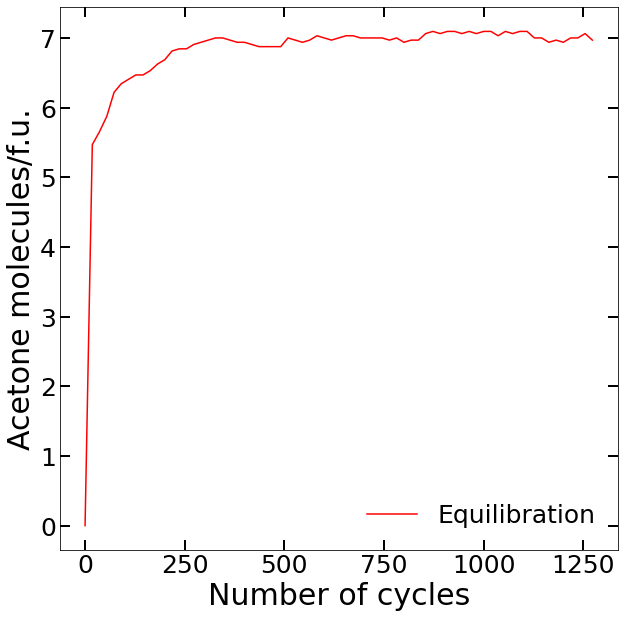

In [5]:
plt.figure(figsize=(10,10))
for i in range(4,5):
    plt.plot(cycles[i]/55,Ntotal[i]/32,'r-',label = 'Equilibration')

plt.legend(frameon=False, prop = {'size':25},fontsize='x-large')
plt.tick_params(direction = 'in', right = True, top = True)
plt.tick_params(axis='both',labelsize = 25,length=10, width=2)
plt.ylabel('Acetone molecules/f.u.',size=30)
plt.xlabel('Number of cycles',size=30)
# plt.savefig('/ihome/kjohnson/pbs13/FlexibleFramework-resultanalysis/acetoneequilib.png',dpi=400, figsize = (10,10), bbox_inches = 'tight')



/ihome/crc/install/python/miniconda3-3.7/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error in 3.6
  # Remove the CWD from sys.path while we load stuff.


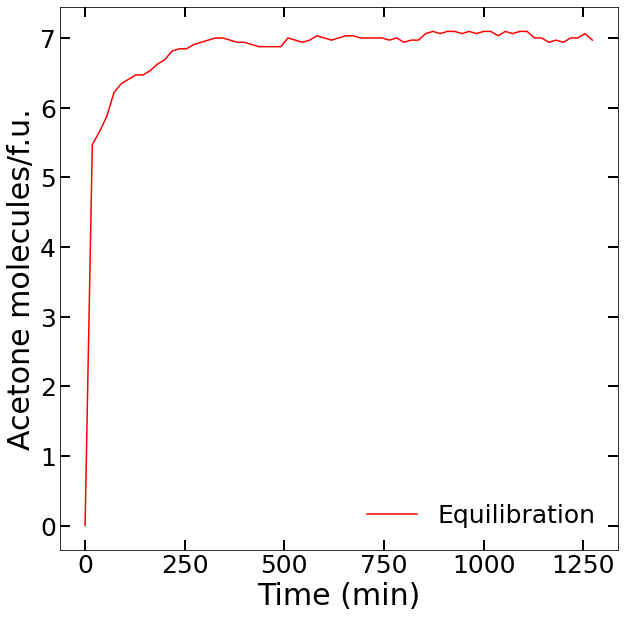

In [6]:
plt.figure(figsize=(10,10))
for i in range(4,5):
    plt.plot(cycles[i]/55,Ntotal[i]/32,'r-',label = 'Equilibration')

plt.legend(frameon=False, prop = {'size':25},fontsize='x-large')
plt.tick_params(direction = 'in', right = True, top = True)
plt.tick_params(axis='both',labelsize = 25,length=10, width=2)
plt.ylabel('Acetone molecules/f.u.',size=30)
plt.xlabel('Time (min)',size=30)
plt.savefig('/ihome/kjohnson/pbs13/FlexibleFramework-resultanalysis/acetoneequilibTime.png',dpi=400, figsize = (10,10), bbox_inches = 'tight')




In [19]:
np.savetxt('/ihome/kjohnson/pbs13/FlexibleFramework-resultanalysis/GCMD/EquilibrationGCMC.txt',np.c_[cycles[4]/55,Ntotal[4]/32])

/ihome/crc/install/python/miniconda3-3.7/lib/python3.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error in 3.6


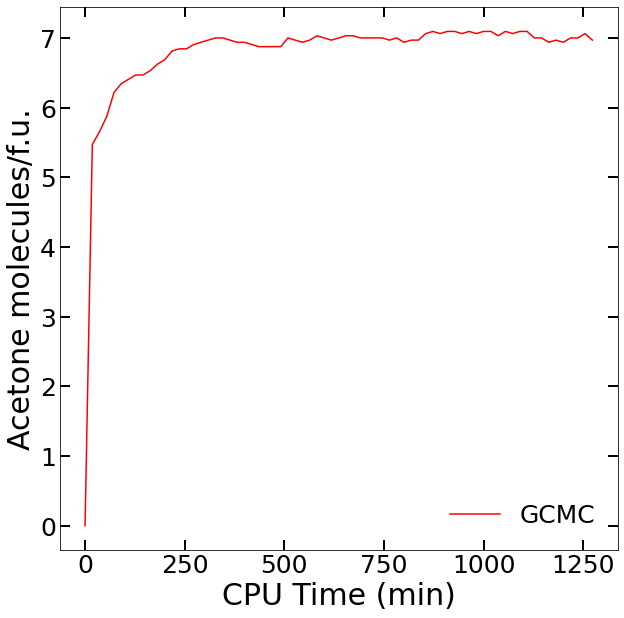

In [18]:
## Plot GCMC and GCMD equilibration plot together
import numpy as np
import matplotlib.pyplot as plt

T_gcmc, N_gcmc = np.loadtxt('/ihome/kjohnson/pbs13/FlexibleFramework-resultanalysis/GCMD/EquilibrationGCMC.txt',unpack=True)
T_gcmd, N_gcmd = np.loadtxt('/ihome/kjohnson/pbs13/FlexibleFramework-resultanalysis/GCMD/GCMDtimeacetoneload.txt',unpack=True)

plt.figure(figsize=(10,10))
plt.plot(T_gcmc,N_gcmc,'r-',label='GCMC')
# plt.plot(T_gcmd,N_gcmd,'k-',label='Hybrid GCMC/MD')
plt.legend(frameon=False, prop = {'size':25},fontsize='x-large')
plt.tick_params(direction = 'in', right = True, top = True)
plt.tick_params(axis='both',labelsize = 25,length=10, width=2)
plt.ylabel('Acetone molecules/f.u.',size=30)
plt.xlabel('CPU Time (min)',size=30)
# plt.grid()
plt.savefig('/ihome/kjohnson/pbs13/FlexibleFramework-resultanalysis/compareGcmc.png',dpi=400, figsize = (10,10), bbox_inches = 'tight')


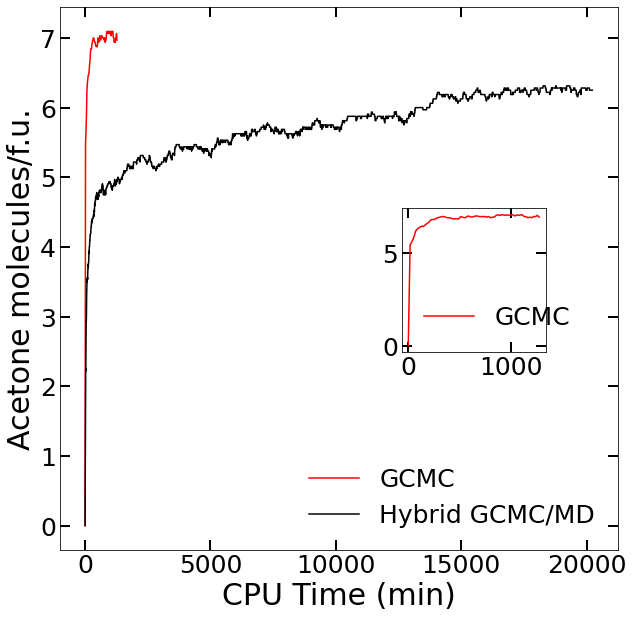

In [16]:
fig, ax1 = plt.subplots(figsize=(10,10))
# fig2, ax2 = plt.subplots(figsize=(5,5))

# These are in unitless percentages of the figure size. (0,0 is bottom left)
left, bottom, width, height = [0.6, 0.4, 0.2, 0.2]
ax2 = fig.add_axes([left, bottom, width, height])


ax1.plot(T_gcmc,N_gcmc,'r-',label='GCMC')
ax1.plot(T_gcmd,N_gcmd,'k-',label='Hybrid GCMC/MD')
ax2.plot(T_gcmc,N_gcmc,'r-',label='GCMC')
ax1.legend(frameon=False, prop = {'size':25},fontsize='x-large')
ax1.tick_params(direction = 'in', right = True, top = True)
ax1.tick_params(axis='both',labelsize = 25,length=10, width=2)
ax1.set_ylabel('Acetone molecules/f.u.',size=30)
ax1.set_xlabel('CPU Time (min)',size=30)
ax2.legend(frameon=False, prop = {'size':25},fontsize='x-large')
ax2.tick_params(direction = 'in', right = True, top = True)
ax2.tick_params(axis='both',labelsize = 25,length=10, width=2)
# ax2.set_ylabel('Acetone molecules/f.u.',size=30)
# ax2.set_xlabel('CPU Time (min)',size=30)
